In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [23]:
img=cv2.imread('sample.png')
#print(img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img

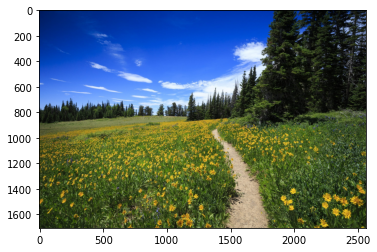

In [24]:
plt.imshow(img)

In [25]:
r,g,b=cv2.split(img)
r=r.flatten()
g=g.flatten()
b=b.flatten()

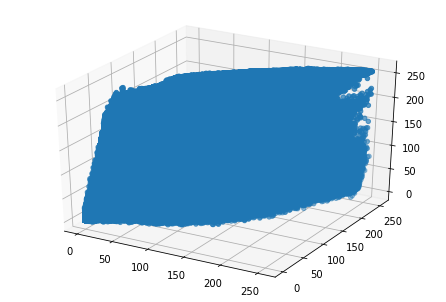

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [27]:
from sklearn.cluster import KMeans
class DominantColors:
  clusters=None
  image=None
  colors=None
  labels=None
  def __init__(self,image,clusters=1):
    self.clusters=clusters
    self.image=image
  def findDominantColors(self):
    img = cv2.imread(self.image)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img.reshape((img.shape[0]*img.shape[1],3))
    self.image=img
    model=KMeans(n_clusters=self.clusters)
    model.fit(img)
    self.colors=model.cluster_centers_
    self.labels=model.labels_
    return self.colors.astype(int)
  def rgbToHex(self,rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
  def plotClusters(self):
    fig=plt.figure()
    ax=Axes3D(fig)
    for label,pix in zip(self.labels,self.image):
      ax.scatter(pix[0], pix[1], pix[2], color = self.rgbToHex(self.colors[label]))
    plt.show()
  def plotHistogram(self):
    numLabels=np.arange(0,self.clusters+1)
    hist,_=np.histogram(self.labels,bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    colors=self.colors
    colors = colors[(-hist).argsort()]
    hist = hist[(-hist).argsort()]
    chart = np.zeros((50, 500, 3), np.uint8)
    start = 0 
    for i in range(self.clusters):
      end=start+hist[i]*500
      r=colors[i][0]
      g=colors[i][1]
      b=colors[i][2]
      cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
      start = end	
    plt.figure()
    plt.axis("off")
    plt.imshow(chart)
    plt.show() 

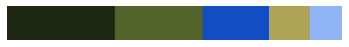

In [28]:
dcs=DominantColors('sample.png',5)
colors=dcs.findDominantColors()
dcs.plotHistogram()